In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


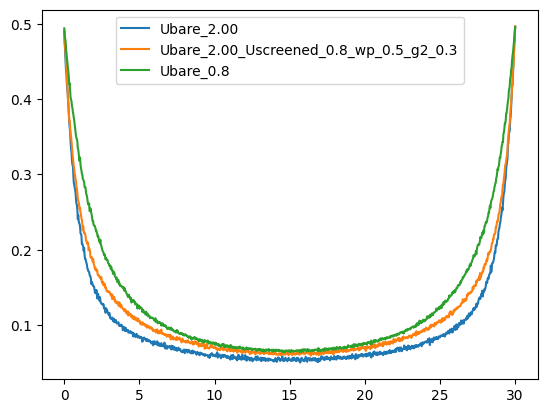

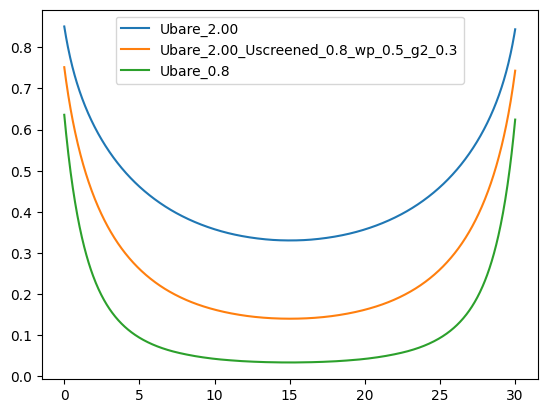

In [ ]:
PATH = "/content/drive/MyDrive/Data/DynamicalU_Susceptibility/"
foldername = [
  "Ubare_2.00/",
  "Ubare_2.00_Uscreened_0.8_wp_0.5_g2_0.3/",
  "Ubare_0.8/"
  ]
filename = [
  "UbUs_1-2023-06-21-Wed-18-35-14.hdf5",
  "UbUs_1-2023-06-21-Wed-19-14-57.hdf5",
  "UbUs_1-2023-06-21-Wed-21-47-18.hdf5"
  ]
sztau_filename = "sztau.dat"

for n in range(3):
    with h5py.File(PATH+foldername[n]+filename[n], "r") as f:
        iw = np.array(f['.axes']['iw'][:])
        tau = np.array(f['.axes']['tau'][:])
        gtau = np.array(f['dmft-last']['ineq-001']['gtau']['value'])
        giw = np.array(f['dmft-last']['ineq-001']['giw']['value'])
        siw = np.array(f['dmft-last']['ineq-001']['siw']['value'])
    plt.figure(1)
    plt.plot(tau, gtau[0,0], label=foldername[n][:-1])
    plt.legend()

for n in range(3):
    sztau = np.loadtxt(PATH+foldername[n]+sztau_filename, usecols=[1,2,3])
    plt.figure(2)
    plt.plot(tau, sztau[:-1,2], label=foldername[n][:-1])
    plt.legend()
